In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import zipfile

# 1. Import Data

## 1.1 Import Data

### 1.1.1 Data for Grocery

In [2]:
path_grocery = Path('cbp22co.txt.zip')

In [3]:
with zipfile.ZipFile(path_grocery, 'r') as zip_ref:
    txt_file = 'cbp22co.txt'
    
    # Open the file inside the ZIP and read it into a DataFrame
    with zip_ref.open(txt_file) as file:
        df_grocery = pd.read_csv(file, delimiter=',')


### 1.1.2 Data for County

In [4]:
path_county = Path('uscounties.csv')

In [5]:
df_county = pd.read_csv(path_county)

### 1.1.3 Data for Diabetes

In [6]:
path_diabetes = Path('IHME_USA_COUNTY_DIABETES_PREVALENCE_1999_2012_NATIONAL_Y2016M08D23.XLSX')

In [7]:
df_diabetes = pd.read_excel(path_diabetes)

### 1.1.4 Data for Education

In [8]:
path_education = Path('Education.xlsx')

In [9]:
df_education = pd.read_excel(path_education)

### 1.1.5 Data for Income

In [10]:
path_income = Path('lapi1124.xlsx')

In [11]:
df_income = pd.read_excel(path_income)

## 1.2 Observe Data

### 1.2.1 Observe Grocery

In [12]:
df_grocery

,fipstate,fipscty,naics,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,est,...,n20_49,n50_99,n100_249,n250_499,n500_999,n1000,n1000_1,n1000_2,n1000_3,n1000_4
0,1,1,------,G,12409,G,117103,G,496158,948,...,102,33,10,3,N,N,N,N,N,N
1,1,1,11----,G,52,G,793,G,3477,10,...,N,N,N,N,N,N,N,N,N,N
2,1,1,113///,H,39,G,686,G,2890,7,...,N,N,N,N,N,N,N,N,N,N
3,1,1,1133//,H,39,G,686,G,2890,7,...,N,N,N,N,N,N,N,N,N,N
4,1,1,11331/,H,39,G,686,G,2890,7,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100799,56,999,81321/,G,6,H,99,H,463,3,...,N,N,N,N,N,N,N,N,N,N
1100800,56,999,813212,G,6,H,99,H,463,3,...,N,N,N,N,N,N,N,N,N,N
1100801,56,999,8133//,J,12,J,309,J,1245,3,...,N,N,N,N,N,N,N,N,N,N
1100802,56,999,81331/,J,12,J,309,J,1245,3,...,N,N,N,N,N,N,N,N,N,N


### 1.2.2 Observe County

In [13]:
df_county

,county,county_ascii,county_full,county_fips,state_id,state_name,lat,lng,population
0,Los Angeles,Los Angeles,Los Angeles County,6037,CA,California,34.3219,-118.2247,9936690
1,Cook,Cook,Cook County,17031,IL,Illinois,41.8401,-87.8168,5225367
2,Harris,Harris,Harris County,48201,TX,Texas,29.8578,-95.3938,4726177
3,Maricopa,Maricopa,Maricopa County,4013,AZ,Arizona,33.3490,-112.4915,4430871
4,San Diego,San Diego,San Diego County,6073,CA,California,33.0343,-116.7350,3289701
...,...,...,...,...,...,...,...,...,...
3139,Blaine,Blaine,Blaine County,31009,NE,Nebraska,41.9128,-99.9768,384
3140,King,King,King County,48269,TX,Texas,33.6165,-100.2558,216
3141,Kenedy,Kenedy,Kenedy County,48261,TX,Texas,26.9285,-97.7017,116
3142,Loving,Loving,Loving County,48301,TX,Texas,31.8493,-103.5800,96


### 1.2.3 Observe Diabetes

In [14]:
df_diabetes

,"Diagnosed and Undiagnosed Diabetes Prevalence by County in the U.S., 1999-2012 (Diabetes Care, 2016)",Unnamed: 1
0,NaN,NaN
1,Tab name,Description
2,Diagnosed,The proportion of adults age 20+ who report a ...
3,Undiagnosed,The proportion of adults age 20+ who do not re...
4,Total,The proportion of adults age 20+ who report a ...
5,Awareness,The proportion of adults age 20+ with a previo...
6,Control,The proportion of adults age 20+ with a previo...
7,NaN,*High FPG/A1C is fasting plasma glucose at lea...
8,NaN,NaN
9,Data citation: Institute for Health Metrics an...,NaN


### 1.2.4 Observe Education

In [15]:
df_education

,"Educational attainment for adults age 25 and older for the United States, States, and counties, 1970–2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,"Note: For 1970 and 1980, the share of adults w...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Source: USDA, Economic Research Service using ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FIPS Code,State,Area name,2003 Urban Influence Code,2013 Urban Influence Code,2013 Rural-urban Continuum Code,2023 Rural-urban Continuum Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...,"Less than a high school diploma, 2018-22","High school diploma only, 2018-22","Some college or associate's degree, 2018-22","Bachelor's degree or higher, 2018-22",Percent of adults with less than a high school...,Percent of adults with a high school diploma o...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...
3,00000,US,United States,NaN,NaN,NaN,NaN,52373312,34158051,11650730,...,28.993579,28.484955,24599698,59741825,64508122,77751347,10.855953,26.364326,28.467714,34.312006
4,01000,AL,Alabama,NaN,NaN,NaN,NaN,1062306,468269,136287,...,29.022866,22.264896,421180,1041725,1032770,932845,12.284601,30.384102,30.12291,27.208387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,72145,PR,Vega Baja Municipio,1,1,1,1,NaN,NaN,NaN,...,23.959976,17.584094,9267,11653,8932,10001,23.252955,29.239957,22.412365,25.094723
3293,72147,PR,Vieques Municipio,12,12,7,6,NaN,NaN,NaN,...,15.886045,10.140029,1668,2793,681,875,27.721456,46.418481,11.317933,14.542131
3294,72149,PR,Villalba Municipio,2,2,2,2,NaN,NaN,NaN,...,14.340816,15.207082,3274,5344,3555,3358,21.08042,34.408602,22.889704,21.621274
3295,72151,PR,Yabucoa Municipio,1,1,1,1,NaN,NaN,NaN,...,19.986177,12.912144,5674,5824,6852,4147,25.221141,25.887896,30.457394,18.433569


### 1.2.5 Observe Income

In [16]:
df_income

,"Table 1. Per Capita Personal Income, by County, 2021–2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Per capita personal income1,NaN,NaN,NaN,Percent change from preceding period,NaN,NaN
1,NaN,Dollars,NaN,NaN,Rank in state,Percent change,NaN,Rank in state
2,NaN,2021,2022.0,2023.0,2023,2022,2023.0,2023
3,United States,64460,66244.0,69810.0,--,2.8,5.4,--
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3219,Washakie,58601,54752.0,57474.0,17,-6.6,5.0,17
3220,Weston,50512,51090.0,54380.0,20,1.1,6.4,9
3221,1. Per capita personal income was computed usi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3222,2. Virginia combination areas consist of 1 or ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Data Processing

## 2.1 Processing Data for Grocery

In [17]:
df_grocery

,fipstate,fipscty,naics,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,est,...,n20_49,n50_99,n100_249,n250_499,n500_999,n1000,n1000_1,n1000_2,n1000_3,n1000_4
0,1,1,------,G,12409,G,117103,G,496158,948,...,102,33,10,3,N,N,N,N,N,N
1,1,1,11----,G,52,G,793,G,3477,10,...,N,N,N,N,N,N,N,N,N,N
2,1,1,113///,H,39,G,686,G,2890,7,...,N,N,N,N,N,N,N,N,N,N
3,1,1,1133//,H,39,G,686,G,2890,7,...,N,N,N,N,N,N,N,N,N,N
4,1,1,11331/,H,39,G,686,G,2890,7,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100799,56,999,81321/,G,6,H,99,H,463,3,...,N,N,N,N,N,N,N,N,N,N
1100800,56,999,813212,G,6,H,99,H,463,3,...,N,N,N,N,N,N,N,N,N,N
1100801,56,999,8133//,J,12,J,309,J,1245,3,...,N,N,N,N,N,N,N,N,N,N
1100802,56,999,81331/,J,12,J,309,J,1245,3,...,N,N,N,N,N,N,N,N,N,N


In [18]:
df_grocery['numeric_naics'] = df_grocery['naics'].str.replace(r'\D', '', regex=True)    # to make sure those /,- would not impact the result
df_grocery = df_grocery[df_grocery['numeric_naics'] == '445110']    # 445110 represents grocery
df_grocery = df_grocery[['fipstate', 'fipscty', 'naics','est']].reset_index().drop('index', axis=1) # keep columns we need
df_grocery

,fipstate,fipscty,naics,est
0,1,1,445110,4
1,1,3,445110,30
2,1,5,445110,5
3,1,7,445110,4
4,1,9,445110,4
...,...,...,...,...
2224,56,33,445110,6
2225,56,35,445110,3
2226,56,37,445110,5
2227,56,39,445110,9


In [19]:
df_grocery['fips'] = df_grocery['fipstate'].astype(str) + df_grocery['fipscty'].apply(lambda x: f"{int(x):03}") 
# combine the stacty fips, uniform the style with other data
df_grocery = df_grocery[['fips', 'est']]    # keep columns we need
df_grocery

,fips,est
0,1001,4
1,1003,30
2,1005,5
3,1007,4
4,1009,4
...,...,...
2224,56033,6
2225,56035,3
2226,56037,5
2227,56039,9


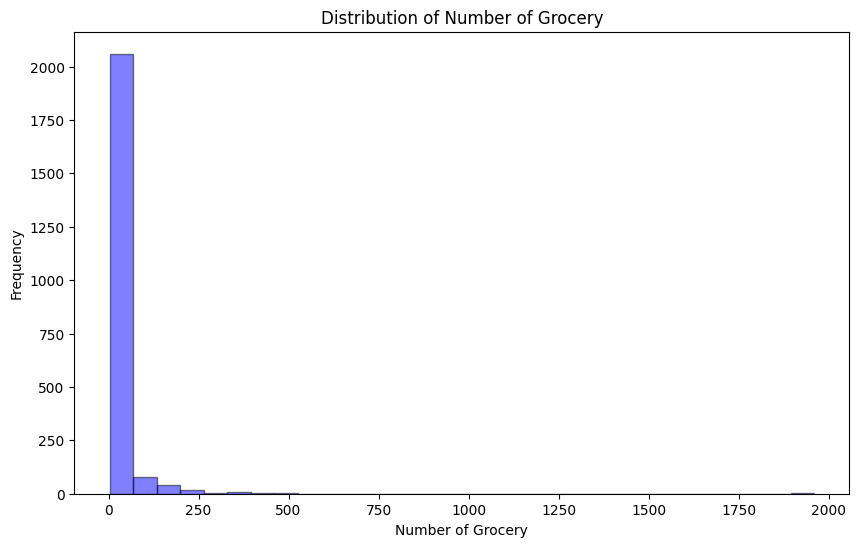

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df_grocery['est'], bins=30, color='blue', edgecolor='black', alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Number of Grocery')
plt.title('Distribution of Number of Grocery')
plt.show()

Conclusion: The distribution of grocery number is pretty right-skewed, but we still need the density number of grocery.

## 2.2 Processing Data for County

In [21]:
df_county = df_county[['county', 'county_fips', 'state_id', 'population']]  # keep columns we need
df_county.columns = ['county', 'fips', 'state', 'population']   # rename columns for future merge
df_county

,county,fips,state,population
0,Los Angeles,6037,CA,9936690
1,Cook,17031,IL,5225367
2,Harris,48201,TX,4726177
3,Maricopa,4013,AZ,4430871
4,San Diego,6073,CA,3289701
...,...,...,...,...
3139,Blaine,31009,NE,384
3140,King,48269,TX,216
3141,Kenedy,48261,TX,116
3142,Loving,48301,TX,96


## 2.3 Processing Data for Diabetes

In [22]:
df_diabetes

,"Diagnosed and Undiagnosed Diabetes Prevalence by County in the U.S., 1999-2012 (Diabetes Care, 2016)",Unnamed: 1
0,NaN,NaN
1,Tab name,Description
2,Diagnosed,The proportion of adults age 20+ who report a ...
3,Undiagnosed,The proportion of adults age 20+ who do not re...
4,Total,The proportion of adults age 20+ who report a ...
5,Awareness,The proportion of adults age 20+ with a previo...
6,Control,The proportion of adults age 20+ with a previo...
7,NaN,*High FPG/A1C is fasting plasma glucose at lea...
8,NaN,NaN
9,Data citation: Institute for Health Metrics an...,NaN


In [23]:
df_diabetes = pd.read_excel('IHME_USA_COUNTY_DIABETES_PREVALENCE_1999_2012_NATIONAL_Y2016M08D23.XLSX', sheet_name='Diagnosed')

In [24]:
df_diabetes.columns = df_diabetes.iloc[0]  # Set the first row as the header
df_diabetes = df_diabetes[1:]  # Drop the first row from the DataFrame
df_diabetes = df_diabetes.reset_index(drop=True)  # Reset the index if needed
df_diabetes

,Location,FIPS,"Prevalence, 1999, Both Sexes","Prevalence, 1999, Females","Prevalence, 1999, Males","Prevalence, 2000, Both Sexes","Prevalence, 2000, Females","Prevalence, 2000, Males","Prevalence, 2001, Both Sexes","Prevalence, 2001, Females",...,"Prevalence, 2010, Males","Prevalence, 2011, Both Sexes","Prevalence, 2011, Females","Prevalence, 2011, Males","Prevalence, 2012, Both Sexes","Prevalence, 2012, Females","Prevalence, 2012, Males","Percent Change, 1999-2012, Males","Percent Change, 1999-2012, Females","Percent Change, 1999-2012, Both Sexes"
0,National,NaN,6.52,6.27,6.78,6.96,6.7,7.23,7.37,7.1,...,10.21,9.98,9.6,10.38,10.22,9.85,10.62,56.61,57.09,56.85
1,Alabama,1,7.94,7.78,8.1,8.41,8.25,8.58,8.93,8.78,...,11.59,11.74,11.76,11.72,12.08,12.01,12.16,50.03,54.38,52.23
2,Autauga County,1001,7.84,7.7,7.99,8.25,8.09,8.42,8.67,8.47,...,11.21,11.24,10.84,11.68,11.44,10.92,12,50.21,41.97,46.03
3,Baldwin County,1003,6.35,5.5,7.26,6.73,5.85,7.66,7.15,6.27,...,10.12,9.52,8.87,10.22,9.76,9.16,10.39,43.24,66.52,53.65
4,Barbour County,1005,9.52,9.4,9.64,10.2,10.08,10.33,10.84,10.75,...,13.77,14.37,14.42,14.31,14.65,14.7,14.59,51.3,56.33,53.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,Sweetwater County,56037,5.52,5.09,5.99,5.85,5.39,6.35,6.2,5.74,...,9.35,9.05,8.56,9.58,9.23,8.72,9.78,63.27,71.42,67.14
3190,Teton County,56039,3.25,3.18,3.33,3.6,3.53,3.68,3.88,3.8,...,5.82,5.81,5.66,5.97,5.91,5.76,6.07,82,81.26,81.63
3191,Uinta County,56041,5.22,5.15,5.3,5.57,5.51,5.64,5.88,5.8,...,8.35,8.12,7.72,8.56,8.57,8.11,9.05,70.73,57.53,64.02
3192,Washakie County,56043,5.64,6.07,5.19,5.97,6.41,5.5,6.21,6.58,...,8.08,7.94,7.73,8.15,8.27,7.92,8.63,66.45,30.54,46.53


In [25]:
df_diabetes = df_diabetes.drop(['Percent Change, 1999-2012, Males',
                              'Percent Change, 1999-2012, Females','Percent Change, 1999-2012, Both Sexes'], axis=1)    
# drop the last few columns
df_diabetes = df_diabetes.drop(columns=[col for col in df_diabetes.columns if 'Male' in col or 'Female' in col])   # just keep both sexes
df_diabetes = df_diabetes.rename(columns=({'Location':'county'}))   # change the column name for uniform
df_diabetes

,county,FIPS,"Prevalence, 1999, Both Sexes","Prevalence, 2000, Both Sexes","Prevalence, 2001, Both Sexes","Prevalence, 2002, Both Sexes","Prevalence, 2003, Both Sexes","Prevalence, 2004, Both Sexes","Prevalence, 2005, Both Sexes","Prevalence, 2006, Both Sexes","Prevalence, 2007, Both Sexes","Prevalence, 2008, Both Sexes","Prevalence, 2009, Both Sexes","Prevalence, 2010, Both Sexes","Prevalence, 2011, Both Sexes","Prevalence, 2012, Both Sexes"
0,National,NaN,6.52,6.96,7.37,7.7,8.11,8.11,8.55,8.94,9.29,9.39,9.65,9.82,9.98,10.22
1,Alabama,1,7.94,8.41,8.93,9.25,9.66,9.66,10.17,10.6,11.02,11.1,11.42,11.63,11.74,12.08
2,Autauga County,1001,7.84,8.25,8.67,8.99,9.39,9.38,9.66,10.16,10.36,10.53,10.7,10.94,11.24,11.44
3,Baldwin County,1003,6.35,6.73,7.15,7.41,7.73,7.69,8.11,8.49,8.75,8.84,9.29,9.41,9.52,9.76
4,Barbour County,1005,9.52,10.2,10.84,11.2,11.64,11.75,12.17,13.29,13.56,13.44,14.41,13.75,14.37,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,Sweetwater County,56037,5.52,5.85,6.2,6.54,6.97,7.02,7.38,7.77,8.1,8.18,8.52,8.84,9.05,9.23
3190,Teton County,56039,3.25,3.6,3.88,4.01,4.25,4.29,4.6,4.86,5.17,5.16,5.36,5.7,5.81,5.91
3191,Uinta County,56041,5.22,5.57,5.88,6.19,6.62,6.54,6.89,7.15,7.48,7.52,7.7,8.01,8.12,8.57
3192,Washakie County,56043,5.64,5.97,6.21,6.44,6.68,6.66,7.06,7.27,7.54,7.69,7.79,7.88,7.94,8.27


In [26]:
# Initialize an empty column for the state
df_diabetes['state'] = None

# Variable to store the current state
current_state = None

# extract those state name from the 'county' column
for index, row in df_diabetes.iterrows():
    if 'County' not in row['county']:  # If the row does not contain 'County', assume it's a state
        current_state = row['county']
    df_diabetes.at[index, 'state'] = current_state  # Assign the current state to the 'state' column

df_diabetes = df_diabetes[df_diabetes['county'].str.contains('County')].reset_index(drop=True)
df_diabetes

,county,FIPS,"Prevalence, 1999, Both Sexes","Prevalence, 2000, Both Sexes","Prevalence, 2001, Both Sexes","Prevalence, 2002, Both Sexes","Prevalence, 2003, Both Sexes","Prevalence, 2004, Both Sexes","Prevalence, 2005, Both Sexes","Prevalence, 2006, Both Sexes","Prevalence, 2007, Both Sexes","Prevalence, 2008, Both Sexes","Prevalence, 2009, Both Sexes","Prevalence, 2010, Both Sexes","Prevalence, 2011, Both Sexes","Prevalence, 2012, Both Sexes",state
0,Autauga County,1001,7.84,8.25,8.67,8.99,9.39,9.38,9.66,10.16,10.36,10.53,10.7,10.94,11.24,11.44,Alabama
1,Baldwin County,1003,6.35,6.73,7.15,7.41,7.73,7.69,8.11,8.49,8.75,8.84,9.29,9.41,9.52,9.76,Alabama
2,Barbour County,1005,9.52,10.2,10.84,11.2,11.64,11.75,12.17,13.29,13.56,13.44,14.41,13.75,14.37,14.65,Alabama
3,Bibb County,1007,8.04,8.65,9.14,9.43,9.74,9.7,10.11,10.73,11.05,11.36,11.5,11.79,11.96,12.32,Alabama
4,Blount County,1009,7.4,7.93,8.49,8.77,9.16,9.13,9.47,10.01,10.45,10.41,10.79,10.91,10.8,11.14,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,Sweetwater County,56037,5.52,5.85,6.2,6.54,6.97,7.02,7.38,7.77,8.1,8.18,8.52,8.84,9.05,9.23,Wyoming
3003,Teton County,56039,3.25,3.6,3.88,4.01,4.25,4.29,4.6,4.86,5.17,5.16,5.36,5.7,5.81,5.91,Wyoming
3004,Uinta County,56041,5.22,5.57,5.88,6.19,6.62,6.54,6.89,7.15,7.48,7.52,7.7,8.01,8.12,8.57,Wyoming
3005,Washakie County,56043,5.64,5.97,6.21,6.44,6.68,6.66,7.06,7.27,7.54,7.69,7.79,7.88,7.94,8.27,Wyoming


In [27]:
columns = list(df_diabetes.columns)  # Get the list of column names
last_column = columns.pop()  # Remove the last column name
columns.insert(1, last_column)  # Insert the last column name at the second position

# Reorder DataFrame with the new column order
df_diabetes = df_diabetes[columns]
df_diabetes

,county,state,FIPS,"Prevalence, 1999, Both Sexes","Prevalence, 2000, Both Sexes","Prevalence, 2001, Both Sexes","Prevalence, 2002, Both Sexes","Prevalence, 2003, Both Sexes","Prevalence, 2004, Both Sexes","Prevalence, 2005, Both Sexes","Prevalence, 2006, Both Sexes","Prevalence, 2007, Both Sexes","Prevalence, 2008, Both Sexes","Prevalence, 2009, Both Sexes","Prevalence, 2010, Both Sexes","Prevalence, 2011, Both Sexes","Prevalence, 2012, Both Sexes"
0,Autauga County,Alabama,1001,7.84,8.25,8.67,8.99,9.39,9.38,9.66,10.16,10.36,10.53,10.7,10.94,11.24,11.44
1,Baldwin County,Alabama,1003,6.35,6.73,7.15,7.41,7.73,7.69,8.11,8.49,8.75,8.84,9.29,9.41,9.52,9.76
2,Barbour County,Alabama,1005,9.52,10.2,10.84,11.2,11.64,11.75,12.17,13.29,13.56,13.44,14.41,13.75,14.37,14.65
3,Bibb County,Alabama,1007,8.04,8.65,9.14,9.43,9.74,9.7,10.11,10.73,11.05,11.36,11.5,11.79,11.96,12.32
4,Blount County,Alabama,1009,7.4,7.93,8.49,8.77,9.16,9.13,9.47,10.01,10.45,10.41,10.79,10.91,10.8,11.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,Sweetwater County,Wyoming,56037,5.52,5.85,6.2,6.54,6.97,7.02,7.38,7.77,8.1,8.18,8.52,8.84,9.05,9.23
3003,Teton County,Wyoming,56039,3.25,3.6,3.88,4.01,4.25,4.29,4.6,4.86,5.17,5.16,5.36,5.7,5.81,5.91
3004,Uinta County,Wyoming,56041,5.22,5.57,5.88,6.19,6.62,6.54,6.89,7.15,7.48,7.52,7.7,8.01,8.12,8.57
3005,Washakie County,Wyoming,56043,5.64,5.97,6.21,6.44,6.68,6.66,7.06,7.27,7.54,7.69,7.79,7.88,7.94,8.27


In [28]:
# Dictionary mapping state names to their abbreviations
state_abbrev = {
    'Alabama': 'AL', 
    'Alaska': 'AK', 
    'Arizona': 'AZ', 
    'Arkansas': 'AR', 
    'California': 'CA',
    'Colorado': 'CO', 
    'Connecticut': 'CT',
    'District of Columbia': 'DC',
    'Delaware': 'DE', 
    'Florida': 'FL', 
    'Georgia': 'GA',
    'Hawaii': 'HI', 
    'Idaho': 'ID', 
    'Illinois': 'IL', 
    'Indiana': 'IN', 
    'Iowa': 'IA',
    'Kansas': 'KS', 
    'Kentucky': 'KY', 
    'Louisiana': 'LA', 
    'Maine': 'ME', 
    'Maryland': 'MD',
    'Massachusetts': 'MA', 
    'Michigan': 'MI', 
    'Minnesota': 'MN', 
    'Mississippi': 'MS', 
    'Missouri': 'MO',
    'Montana': 'MT', 
    'Nebraska': 'NE', 
    'Nevada': 'NV', 
    'New Hampshire': 'NH', 
    'New Jersey': 'NJ',
    'New Mexico': 'NM', 
    'New York': 'NY', 
    'North Carolina': 'NC', 
    'North Dakota': 'ND', 
    'Ohio': 'OH',
    'Oklahoma': 'OK', 
    'Oregon': 'OR', 
    'Pennsylvania': 'PA', 
    'Rhode Island': 'RI', 
    'South Carolina': 'SC',
    'South Dakota': 'SD', 
    'Tennessee': 'TN', 
    'Texas': 'TX', 
    'Utah': 'UT', 
    'Vermont': 'VT',
    'Virginia': 'VA', 
    'Washington': 'WA', 
    'West Virginia': 'WV', 
    'Wisconsin': 'WI', 
    'Wyoming': 'WY'
}

# Map the full state names to abbreviations
df_diabetes['state'] = df_diabetes['state'].map(state_abbrev)
df_diabetes['county'] = df_diabetes['county'].str.replace(' County', '', regex=False) # exclude the County in the content to make uniform
df_diabetes = df_diabetes.rename(columns={'FIPS': 'fips'})
df_diabetes

,county,state,fips,"Prevalence, 1999, Both Sexes","Prevalence, 2000, Both Sexes","Prevalence, 2001, Both Sexes","Prevalence, 2002, Both Sexes","Prevalence, 2003, Both Sexes","Prevalence, 2004, Both Sexes","Prevalence, 2005, Both Sexes","Prevalence, 2006, Both Sexes","Prevalence, 2007, Both Sexes","Prevalence, 2008, Both Sexes","Prevalence, 2009, Both Sexes","Prevalence, 2010, Both Sexes","Prevalence, 2011, Both Sexes","Prevalence, 2012, Both Sexes"
0,Autauga,AL,1001,7.84,8.25,8.67,8.99,9.39,9.38,9.66,10.16,10.36,10.53,10.7,10.94,11.24,11.44
1,Baldwin,AL,1003,6.35,6.73,7.15,7.41,7.73,7.69,8.11,8.49,8.75,8.84,9.29,9.41,9.52,9.76
2,Barbour,AL,1005,9.52,10.2,10.84,11.2,11.64,11.75,12.17,13.29,13.56,13.44,14.41,13.75,14.37,14.65
3,Bibb,AL,1007,8.04,8.65,9.14,9.43,9.74,9.7,10.11,10.73,11.05,11.36,11.5,11.79,11.96,12.32
4,Blount,AL,1009,7.4,7.93,8.49,8.77,9.16,9.13,9.47,10.01,10.45,10.41,10.79,10.91,10.8,11.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,Sweetwater,WY,56037,5.52,5.85,6.2,6.54,6.97,7.02,7.38,7.77,8.1,8.18,8.52,8.84,9.05,9.23
3003,Teton,WY,56039,3.25,3.6,3.88,4.01,4.25,4.29,4.6,4.86,5.17,5.16,5.36,5.7,5.81,5.91
3004,Uinta,WY,56041,5.22,5.57,5.88,6.19,6.62,6.54,6.89,7.15,7.48,7.52,7.7,8.01,8.12,8.57
3005,Washakie,WY,56043,5.64,5.97,6.21,6.44,6.68,6.66,7.06,7.27,7.54,7.69,7.79,7.88,7.94,8.27


In [29]:
# Specify the starting column by name
start_column = 'Prevalence, 1999, Both Sexes'

# Calculate the mean from the specified column to the end for each row
df_diabetes['mean rate'] = df_diabetes.loc[:, start_column:].mean(axis=1)   # we would use the average value of the diagnosed rate
df_diabetes = df_diabetes[['county', 'state', 'fips', 'mean rate']] # just keep columns we need
df_diabetes

,county,state,fips,mean rate
0,Autauga,AL,1001,9.825
1,Baldwin,AL,1003,8.230714
2,Barbour,AL,1005,12.485
3,Bibb,AL,1007,10.394286
4,Blount,AL,1009,9.632857
...,...,...,...,...
3002,Sweetwater,WY,56037,7.512143
3003,Teton,WY,56039,4.703571
3004,Uinta,WY,56041,6.961429
3005,Washakie,WY,56043,7.074286


## 2.4 Processing Data for Education

In [30]:
df_education

,"Educational attainment for adults age 25 and older for the United States, States, and counties, 1970–2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,"Note: For 1970 and 1980, the share of adults w...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Source: USDA, Economic Research Service using ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FIPS Code,State,Area name,2003 Urban Influence Code,2013 Urban Influence Code,2013 Rural-urban Continuum Code,2023 Rural-urban Continuum Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...,"Less than a high school diploma, 2018-22","High school diploma only, 2018-22","Some college or associate's degree, 2018-22","Bachelor's degree or higher, 2018-22",Percent of adults with less than a high school...,Percent of adults with a high school diploma o...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...
3,00000,US,United States,NaN,NaN,NaN,NaN,52373312,34158051,11650730,...,28.993579,28.484955,24599698,59741825,64508122,77751347,10.855953,26.364326,28.467714,34.312006
4,01000,AL,Alabama,NaN,NaN,NaN,NaN,1062306,468269,136287,...,29.022866,22.264896,421180,1041725,1032770,932845,12.284601,30.384102,30.12291,27.208387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,72145,PR,Vega Baja Municipio,1,1,1,1,NaN,NaN,NaN,...,23.959976,17.584094,9267,11653,8932,10001,23.252955,29.239957,22.412365,25.094723
3293,72147,PR,Vieques Municipio,12,12,7,6,NaN,NaN,NaN,...,15.886045,10.140029,1668,2793,681,875,27.721456,46.418481,11.317933,14.542131
3294,72149,PR,Villalba Municipio,2,2,2,2,NaN,NaN,NaN,...,14.340816,15.207082,3274,5344,3555,3358,21.08042,34.408602,22.889704,21.621274
3295,72151,PR,Yabucoa Municipio,1,1,1,1,NaN,NaN,NaN,...,19.986177,12.912144,5674,5824,6852,4147,25.221141,25.887896,30.457394,18.433569


In [31]:
df_education = pd.read_excel(path_education, skiprows=3)
df_education

,FIPS Code,State,Area name,2003 Urban Influence Code,2013 Urban Influence Code,2013 Rural-urban Continuum Code,2023 Rural-urban Continuum Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2008-12","Percent of adults with a bachelor's degree or higher, 2008-12","Less than a high school diploma, 2018-22","High school diploma only, 2018-22","Some college or associate's degree, 2018-22","Bachelor's degree or higher, 2018-22","Percent of adults with less than a high school diploma, 2018-22","Percent of adults with a high school diploma only, 2018-22","Percent of adults completing some college or associate's degree, 2018-22","Percent of adults with a bachelor's degree or higher, 2018-22"
0,0,US,United States,NaN,NaN,NaN,NaN,52373312.0,34158051.0,11650730.0,...,28.993579,28.484955,24599698.0,59741825.0,64508122.0,77751347.0,10.855953,26.364326,28.467714,34.312006
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,1062306.0,468269.0,136287.0,...,29.022866,22.264896,421180.0,1041725.0,1032770.0,932845.0,12.284601,30.384102,30.122910,27.208387
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,29.618142,21.707831,3857.0,12517.0,11935.0,11879.0,9.597392,31.146113,29.697920,29.558575
3,1003,AL,Baldwin County,5.0,2.0,3.0,3.0,18726.0,8426.0,2334.0,...,31.819503,27.741591,14031.0,46391.0,52215.0,54385.0,8.400690,27.775383,31.262349,32.561579
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,...,25.771784,14.524286,4155.0,6507.0,4913.0,2100.0,23.507779,36.814710,27.796322,11.881188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,72145,PR,Vega Baja Municipio,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,23.959976,17.584094,9267.0,11653.0,8932.0,10001.0,23.252955,29.239957,22.412365,25.094723
3290,72147,PR,Vieques Municipio,12.0,12.0,7.0,6.0,NaN,NaN,NaN,...,15.886045,10.140029,1668.0,2793.0,681.0,875.0,27.721456,46.418481,11.317933,14.542131
3291,72149,PR,Villalba Municipio,2.0,2.0,2.0,2.0,NaN,NaN,NaN,...,14.340816,15.207082,3274.0,5344.0,3555.0,3358.0,21.080420,34.408602,22.889704,21.621274
3292,72151,PR,Yabucoa Municipio,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,19.986177,12.912144,5674.0,5824.0,6852.0,4147.0,25.221141,25.887896,30.457394,18.433569


In [32]:
us_states = [
    "Alabama", 
    "Alaska", 
    "Arizona", 
    "Arkansas", 
    "California", 
    "Colorado", 
    "Connecticut", 
    "District of Columbia",
    "Delaware", 
    "Florida", 
    "Georgia", 
    "Hawaii", 
    "Idaho", 
    "Illinois", 
    "Indiana", 
    "Iowa", 
    "Kansas", 
    "Kentucky", 
    "Louisiana", 
    "Maine", 
    "Maryland", 
    "Massachusetts", 
    "Michigan", 
    "Minnesota", 
    "Mississippi", 
    "Missouri", 
    "Montana", 
    "Nebraska", 
    "Nevada", 
    "New Hampshire", 
    "New Jersey", 
    "New Mexico", 
    "New York", 
    "North Carolina", 
    "North Dakota", 
    "Ohio", 
    "Oklahoma", 
    "Oregon", 
    "Pennsylvania", 
    "Rhode Island", 
    "South Carolina", 
    "South Dakota", 
    "Tennessee", 
    "Texas", 
    "Utah", 
    "Vermont", 
    "Virginia", 
    "Washington", 
    "West Virginia", 
    "Wisconsin", 
    "Wyoming"
             ]


In [33]:
df_education = df_education[df_education['Area name']!='United States'] # leave the state and county only in the dataframe
df_education = df_education.reset_index().drop('index', axis=1)
df_education = df_education[~df_education['Area name'].isin(us_states)].reset_index(drop=True)
df_education = df_education[df_education['State']!='PR']  # do not need PR, sorry for that
df_education

,FIPS Code,State,Area name,2003 Urban Influence Code,2013 Urban Influence Code,2013 Rural-urban Continuum Code,2023 Rural-urban Continuum Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2008-12","Percent of adults with a bachelor's degree or higher, 2008-12","Less than a high school diploma, 2018-22","High school diploma only, 2018-22","Some college or associate's degree, 2018-22","Bachelor's degree or higher, 2018-22","Percent of adults with less than a high school diploma, 2018-22","Percent of adults with a high school diploma only, 2018-22","Percent of adults completing some college or associate's degree, 2018-22","Percent of adults with a bachelor's degree or higher, 2018-22"
0,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,29.618142,21.707831,3857.0,12517.0,11935.0,11879.0,9.597392,31.146113,29.697920,29.558575
1,1003,AL,Baldwin County,5.0,2.0,3.0,3.0,18726.0,8426.0,2334.0,...,31.819503,27.741591,14031.0,46391.0,52215.0,54385.0,8.400690,27.775383,31.262349,32.561579
2,1005,AL,Barbour County,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,...,25.771784,14.524286,4155.0,6507.0,4913.0,2100.0,23.507779,36.814710,27.796322,11.881188
3,1007,AL,Bibb County,1.0,1.0,1.0,1.0,5272.0,1402.0,238.0,...,25.538085,8.996005,3366.0,6510.0,4310.0,1739.0,21.136578,40.879121,27.064364,10.919937
4,1009,AL,Blount County,1.0,1.0,1.0,1.0,10677.0,3440.0,626.0,...,27.124512,12.381469,7447.0,14414.0,12939.0,6017.0,18.244849,35.313717,31.700027,14.741407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,56037,WY,Sweetwater County,8.0,8.0,5.0,5.0,4393.0,3731.0,986.0,...,37.275232,17.006235,1919.0,9010.0,11151.0,5514.0,6.954410,32.652026,40.410959,19.982605
3159,56039,WY,Teton County,8.0,8.0,7.0,7.0,708.0,908.0,524.0,...,23.332485,48.994399,721.0,2976.0,3400.0,10776.0,4.034018,16.650814,19.023107,60.292061
3160,56041,WY,Uinta County,8.0,8.0,7.0,7.0,1569.0,1517.0,445.0,...,35.045548,18.272985,748.0,4821.0,5169.0,2536.0,5.635076,36.319120,38.940786,19.105017
3161,56043,WY,Washakie County,11.0,11.0,7.0,9.0,1572.0,1437.0,590.0,...,35.062865,23.339826,292.0,1571.0,2491.0,1167.0,5.288897,28.454990,45.118638,21.137475


In [34]:
# Select the 2nd and 3rd columns by name
cols_to_keep = df_education.columns[1:3].tolist()

# Select columns that contain '2018' through '2022' in their names
year_cols = df_education.filter(regex='2018-22').columns.tolist() # keep the latest data only

# Combine the lists of columns to keep
final_cols = cols_to_keep + year_cols

# Select the desired columns from the DataFrame
df_education = df_education[final_cols]

df_education

,State,Area name,"Less than a high school diploma, 2018-22","High school diploma only, 2018-22","Some college or associate's degree, 2018-22","Bachelor's degree or higher, 2018-22","Percent of adults with less than a high school diploma, 2018-22","Percent of adults with a high school diploma only, 2018-22","Percent of adults completing some college or associate's degree, 2018-22","Percent of adults with a bachelor's degree or higher, 2018-22"
0,AL,Autauga County,3857.0,12517.0,11935.0,11879.0,9.597392,31.146113,29.697920,29.558575
1,AL,Baldwin County,14031.0,46391.0,52215.0,54385.0,8.400690,27.775383,31.262349,32.561579
2,AL,Barbour County,4155.0,6507.0,4913.0,2100.0,23.507779,36.814710,27.796322,11.881188
3,AL,Bibb County,3366.0,6510.0,4310.0,1739.0,21.136578,40.879121,27.064364,10.919937
4,AL,Blount County,7447.0,14414.0,12939.0,6017.0,18.244849,35.313717,31.700027,14.741407
...,...,...,...,...,...,...,...,...,...,...
3158,WY,Sweetwater County,1919.0,9010.0,11151.0,5514.0,6.954410,32.652026,40.410959,19.982605
3159,WY,Teton County,721.0,2976.0,3400.0,10776.0,4.034018,16.650814,19.023107,60.292061
3160,WY,Uinta County,748.0,4821.0,5169.0,2536.0,5.635076,36.319120,38.940786,19.105017
3161,WY,Washakie County,292.0,1571.0,2491.0,1167.0,5.288897,28.454990,45.118638,21.137475


In [35]:
df_education.columns = ['state', 'county', '< high school', 'high school', 'college or associate', '> bachelor', 
                        '< high school %', 'high school %', 'college or associate %', '> bachelor %']   
# rename those columns in a concise style

df_education = df_education.copy()
df_education['county'] = df_education['county'].str.replace(' County', '', regex=False) # exclude the County in the content of columns

df_education

,state,county,< high school,high school,college or associate,> bachelor,< high school %,high school %,college or associate %,> bachelor %
0,AL,Autauga,3857.0,12517.0,11935.0,11879.0,9.597392,31.146113,29.697920,29.558575
1,AL,Baldwin,14031.0,46391.0,52215.0,54385.0,8.400690,27.775383,31.262349,32.561579
2,AL,Barbour,4155.0,6507.0,4913.0,2100.0,23.507779,36.814710,27.796322,11.881188
3,AL,Bibb,3366.0,6510.0,4310.0,1739.0,21.136578,40.879121,27.064364,10.919937
4,AL,Blount,7447.0,14414.0,12939.0,6017.0,18.244849,35.313717,31.700027,14.741407
...,...,...,...,...,...,...,...,...,...,...
3158,WY,Sweetwater,1919.0,9010.0,11151.0,5514.0,6.954410,32.652026,40.410959,19.982605
3159,WY,Teton,721.0,2976.0,3400.0,10776.0,4.034018,16.650814,19.023107,60.292061
3160,WY,Uinta,748.0,4821.0,5169.0,2536.0,5.635076,36.319120,38.940786,19.105017
3161,WY,Washakie,292.0,1571.0,2491.0,1167.0,5.288897,28.454990,45.118638,21.137475


## 2.5 Processing Data for Income

In [36]:
df_income

,"Table 1. Per Capita Personal Income, by County, 2021–2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Per capita personal income1,NaN,NaN,NaN,Percent change from preceding period,NaN,NaN
1,NaN,Dollars,NaN,NaN,Rank in state,Percent change,NaN,Rank in state
2,NaN,2021,2022.0,2023.0,2023,2022,2023.0,2023
3,United States,64460,66244.0,69810.0,--,2.8,5.4,--
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3219,Washakie,58601,54752.0,57474.0,17,-6.6,5.0,17
3220,Weston,50512,51090.0,54380.0,20,1.1,6.4,9
3221,1. Per capita personal income was computed usi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3222,2. Virginia combination areas consist of 1 or ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_income.columns = df_income.iloc[0]  # Set the first row as the header
df_income = df_income[3:]  # Drop the first 3 rows from the DataFrame
df_income = df_income.reset_index(drop=True)  # Reset the index if needed
df_income

,NaN,Per capita personal income1,NaN,NaN,NaN,Percent change from preceding period,NaN,NaN
0,United States,64460,66244.0,69810.0,--,2.8,5.4,--
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,50483,51683.0,54209.0,--,2.4,4.9,--
3,Autauga,49174,49811.0,53079.0,10,1.3,6.6,6
4,Baldwin,56285,57621.0,60969.0,4,2.4,5.8,12
...,...,...,...,...,...,...,...,...
3216,Washakie,58601,54752.0,57474.0,17,-6.6,5.0,17
3217,Weston,50512,51090.0,54380.0,20,1.1,6.4,9
3218,1. Per capita personal income was computed usi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3219,2. Virginia combination areas consist of 1 or ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_income.columns = [f'Unnamed_{i}' if pd.isna(col) else col for i, col in enumerate(df_income.columns)]    # fill those empty column name
df_income

,Unnamed_0,Per capita personal income1,Unnamed_2,Unnamed_3,Unnamed_4,Percent change from preceding period,Unnamed_6,Unnamed_7
0,United States,64460,66244.0,69810.0,--,2.8,5.4,--
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,50483,51683.0,54209.0,--,2.4,4.9,--
3,Autauga,49174,49811.0,53079.0,10,1.3,6.6,6
4,Baldwin,56285,57621.0,60969.0,4,2.4,5.8,12
...,...,...,...,...,...,...,...,...
3216,Washakie,58601,54752.0,57474.0,17,-6.6,5.0,17
3217,Weston,50512,51090.0,54380.0,20,1.1,6.4,9
3218,1. Per capita personal income was computed usi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3219,2. Virginia combination areas consist of 1 or ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_income.columns = ['county', '2021(dollar)', '2022(dollar)', '2023(dollar)', '2023(dollar rank in state)', 
                     '2022(percent change)', '2023(percent change)', '2023(percent rank in state)']
# rename those columns into a concise style

df_income = df_income.dropna()  # drop those contains missing values
df_income = df_income[['county', '2021(dollar)', '2022(dollar)', '2023(dollar)']].reset_index().drop('index', axis=1)   
# select columns we need

df_income

,county,2021(dollar),2022(dollar),2023(dollar)
0,United States,64460,66244.0,69810.0
1,Alabama,50483,51683.0,54209.0
2,Autauga,49174,49811.0,53079.0
3,Baldwin,56285,57621.0,60969.0
4,Barbour,40954,41031.0,41531.0
...,...,...,...,...
3160,Sweetwater,56150,60115.0,64115.0
3161,Teton,353263,418669.0,471751.0
3162,Uinta,44685,46401.0,49350.0
3163,Washakie,58601,54752.0,57474.0


In [40]:
df_income = df_income[df_income['county']!='United States'] # leave the state and county only in the dataframe
df_income = df_income.reset_index().drop('index', axis=1)
df_income

,county,2021(dollar),2022(dollar),2023(dollar)
0,Alabama,50483,51683.0,54209.0
1,Autauga,49174,49811.0,53079.0
2,Baldwin,56285,57621.0,60969.0
3,Barbour,40954,41031.0,41531.0
4,Bibb,37362,38196.0,39835.0
...,...,...,...,...
3159,Sweetwater,56150,60115.0,64115.0
3160,Teton,353263,418669.0,471751.0
3161,Uinta,44685,46401.0,49350.0
3162,Washakie,58601,54752.0,57474.0


In [41]:
# Initialize the `state` column
df_income['state'] = None

# Track the current state name
current_state = None

# Loop through each row in the DataFrame
for i, row in df_income.iterrows():
    if row['county'] in us_states:
        # If `col1` contains a state name, update `current_state`
        current_state = row['county']
    # Assign the current state to the `State` column
    df_income.at[i, 'state'] = current_state

df_income = df_income[~df_income['county'].isin(us_states)].reset_index(drop=True)

df_income['state'] = df_income['state'].map(state_abbrev)   # after storing those states in the new columns, switch their style
df_income

,county,2021(dollar),2022(dollar),2023(dollar),state
0,Autauga,49174,49811.0,53079.0,AL
1,Baldwin,56285,57621.0,60969.0,AL
2,Barbour,40954,41031.0,41531.0,AL
3,Bibb,37362,38196.0,39835.0,AL
4,Blount,42975,44063.0,45021.0,AL
...,...,...,...,...,...
3049,Sweetwater,56150,60115.0,64115.0,WY
3050,Teton,353263,418669.0,471751.0,WY
3051,Uinta,44685,46401.0,49350.0,WY
3052,Washakie,58601,54752.0,57474.0,WY


In [42]:
df_income['average income'] = (df_income['2021(dollar)'] + df_income['2022(dollar)'] + df_income['2023(dollar)']) / 3
df_income = df_income[['county', 'state', 'average income']]
df_income

,county,state,average income
0,Autauga,AL,50688.0
1,Baldwin,AL,58291.666667
2,Barbour,AL,41172.0
3,Bibb,AL,38464.333333
4,Blount,AL,44019.666667
...,...,...,...
3049,Sweetwater,WY,60126.666667
3050,Teton,WY,414561.0
3051,Uinta,WY,46812.0
3052,Washakie,WY,56942.333333


# 3. Regression

## 3.1 Data Prepare

In [43]:
df_grocery

,fips,est
0,1001,4
1,1003,30
2,1005,5
3,1007,4
4,1009,4
...,...,...
2224,56033,6
2225,56035,3
2226,56037,5
2227,56039,9


In [44]:
df_grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fips    2229 non-null   object
 1   est     2229 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 35.0+ KB


In [45]:
df_education

,state,county,< high school,high school,college or associate,> bachelor,< high school %,high school %,college or associate %,> bachelor %
0,AL,Autauga,3857.0,12517.0,11935.0,11879.0,9.597392,31.146113,29.697920,29.558575
1,AL,Baldwin,14031.0,46391.0,52215.0,54385.0,8.400690,27.775383,31.262349,32.561579
2,AL,Barbour,4155.0,6507.0,4913.0,2100.0,23.507779,36.814710,27.796322,11.881188
3,AL,Bibb,3366.0,6510.0,4310.0,1739.0,21.136578,40.879121,27.064364,10.919937
4,AL,Blount,7447.0,14414.0,12939.0,6017.0,18.244849,35.313717,31.700027,14.741407
...,...,...,...,...,...,...,...,...,...,...
3158,WY,Sweetwater,1919.0,9010.0,11151.0,5514.0,6.954410,32.652026,40.410959,19.982605
3159,WY,Teton,721.0,2976.0,3400.0,10776.0,4.034018,16.650814,19.023107,60.292061
3160,WY,Uinta,748.0,4821.0,5169.0,2536.0,5.635076,36.319120,38.940786,19.105017
3161,WY,Washakie,292.0,1571.0,2491.0,1167.0,5.288897,28.454990,45.118638,21.137475


In [46]:
df_diabetes

,county,state,fips,mean rate
0,Autauga,AL,1001,9.825
1,Baldwin,AL,1003,8.230714
2,Barbour,AL,1005,12.485
3,Bibb,AL,1007,10.394286
4,Blount,AL,1009,9.632857
...,...,...,...,...
3002,Sweetwater,WY,56037,7.512143
3003,Teton,WY,56039,4.703571
3004,Uinta,WY,56041,6.961429
3005,Washakie,WY,56043,7.074286


In [47]:
df_income

,county,state,average income
0,Autauga,AL,50688.0
1,Baldwin,AL,58291.666667
2,Barbour,AL,41172.0
3,Bibb,AL,38464.333333
4,Blount,AL,44019.666667
...,...,...,...
3049,Sweetwater,WY,60126.666667
3050,Teton,WY,414561.0
3051,Uinta,WY,46812.0
3052,Washakie,WY,56942.333333


In [48]:
df_county

,county,fips,state,population
0,Los Angeles,6037,CA,9936690
1,Cook,17031,IL,5225367
2,Harris,48201,TX,4726177
3,Maricopa,4013,AZ,4430871
4,San Diego,6073,CA,3289701
...,...,...,...,...
3139,Blaine,31009,NE,384
3140,King,48269,TX,216
3141,Kenedy,48261,TX,116
3142,Loving,48301,TX,96


In [49]:
df_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   county      3144 non-null   object
 1   fips        3144 non-null   int64 
 2   state       3144 non-null   object
 3   population  3144 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 98.4+ KB


In [50]:
df_county = df_county.copy()
df_county['fips'] = df_county['fips'].astype('str')

df_grocery = df_grocery.copy()
df_grocery['fips'] = df_grocery['fips'].astype('str')

In [51]:
# merge the data one by one
df_pre = pd.merge(df_grocery, df_county, on='fips')
df_pre = pd.merge(df_pre, df_diabetes, on=['state', 'county'])
df_pre = pd.merge(df_pre, df_education, on=['state', 'county'])
df_pre = pd.merge(df_pre, df_income, on=['state', 'county'])
df_pre


,fips_x,est,county,state,population,fips_y,mean rate,< high school,high school,college or associate,> bachelor,< high school %,high school %,college or associate %,> bachelor %,average income
0,1001,4,Autauga,AL,58761,1001,9.825,3857.0,12517.0,11935.0,11879.0,9.597392,31.146113,29.697920,29.558575,50688.0
1,1003,30,Baldwin,AL,233420,1003,8.230714,14031.0,46391.0,52215.0,54385.0,8.400690,27.775383,31.262349,32.561579,58291.666667
2,1005,5,Barbour,AL,24877,1005,12.485,4155.0,6507.0,4913.0,2100.0,23.507779,36.814710,27.796322,11.881188,41172.0
3,1007,4,Bibb,AL,22251,1007,10.394286,3366.0,6510.0,4310.0,1739.0,21.136578,40.879121,27.064364,10.919937,38464.333333
4,1009,4,Blount,AL,59077,1009,9.632857,7447.0,14414.0,12939.0,6017.0,18.244849,35.313717,31.700027,14.741407,44019.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,56033,6,Sheridan,WY,31176,56033,6.662857,814.0,6854.0,7295.0,7083.0,3.692280,31.089540,33.089903,32.128277,69334.666667
1560,56035,3,Sublette,WY,8801,56035,5.963571,256.0,1734.0,2612.0,1582.0,4.139715,28.040103,42.238034,25.582147,67225.333333
1561,56037,5,Sweetwater,WY,42079,56037,7.512143,1919.0,9010.0,11151.0,5514.0,6.954410,32.652026,40.410959,19.982605,60126.666667
1562,56039,9,Teton,WY,23346,56039,4.703571,721.0,2976.0,3400.0,10776.0,4.034018,16.650814,19.023107,60.292061,414561.0


In [52]:
df_pre = df_pre.drop(columns={'fips_y'})
df_pre = df_pre.rename(columns={'fips_x': 'fips'})
df_pre

,fips,est,county,state,population,mean rate,< high school,high school,college or associate,> bachelor,< high school %,high school %,college or associate %,> bachelor %,average income
0,1001,4,Autauga,AL,58761,9.825,3857.0,12517.0,11935.0,11879.0,9.597392,31.146113,29.697920,29.558575,50688.0
1,1003,30,Baldwin,AL,233420,8.230714,14031.0,46391.0,52215.0,54385.0,8.400690,27.775383,31.262349,32.561579,58291.666667
2,1005,5,Barbour,AL,24877,12.485,4155.0,6507.0,4913.0,2100.0,23.507779,36.814710,27.796322,11.881188,41172.0
3,1007,4,Bibb,AL,22251,10.394286,3366.0,6510.0,4310.0,1739.0,21.136578,40.879121,27.064364,10.919937,38464.333333
4,1009,4,Blount,AL,59077,9.632857,7447.0,14414.0,12939.0,6017.0,18.244849,35.313717,31.700027,14.741407,44019.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,56033,6,Sheridan,WY,31176,6.662857,814.0,6854.0,7295.0,7083.0,3.692280,31.089540,33.089903,32.128277,69334.666667
1560,56035,3,Sublette,WY,8801,5.963571,256.0,1734.0,2612.0,1582.0,4.139715,28.040103,42.238034,25.582147,67225.333333
1561,56037,5,Sweetwater,WY,42079,7.512143,1919.0,9010.0,11151.0,5514.0,6.954410,32.652026,40.410959,19.982605,60126.666667
1562,56039,9,Teton,WY,23346,4.703571,721.0,2976.0,3400.0,10776.0,4.034018,16.650814,19.023107,60.292061,414561.0


In [55]:
df_pre['density'] = df_pre['est'] / df_pre['population'] *1000000  # define density = num / M people
df_pre = df_pre.drop(columns={'est', 'population'})

df_pre

,fips,county,state,mean rate,< high school,high school,college or associate,> bachelor,< high school %,high school %,college or associate %,> bachelor %,average income,density
0,1001,Autauga,AL,9.825,3857.0,12517.0,11935.0,11879.0,9.597392,31.146113,29.697920,29.558575,50688.0,68.072361
1,1003,Baldwin,AL,8.230714,14031.0,46391.0,52215.0,54385.0,8.400690,27.775383,31.262349,32.561579,58291.666667,128.523691
2,1005,Barbour,AL,12.485,4155.0,6507.0,4913.0,2100.0,23.507779,36.814710,27.796322,11.881188,41172.0,200.988865
3,1007,Bibb,AL,10.394286,3366.0,6510.0,4310.0,1739.0,21.136578,40.879121,27.064364,10.919937,38464.333333,179.767201
4,1009,Blount,AL,9.632857,7447.0,14414.0,12939.0,6017.0,18.244849,35.313717,31.700027,14.741407,44019.666667,67.708245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,56033,Sheridan,WY,6.662857,814.0,6854.0,7295.0,7083.0,3.692280,31.089540,33.089903,32.128277,69334.666667,192.455735
1560,56035,Sublette,WY,5.963571,256.0,1734.0,2612.0,1582.0,4.139715,28.040103,42.238034,25.582147,67225.333333,340.870356
1561,56037,Sweetwater,WY,7.512143,1919.0,9010.0,11151.0,5514.0,6.954410,32.652026,40.410959,19.982605,60126.666667,118.824117
1562,56039,Teton,WY,4.703571,721.0,2976.0,3400.0,10776.0,4.034018,16.650814,19.023107,60.292061,414561.0,385.505012


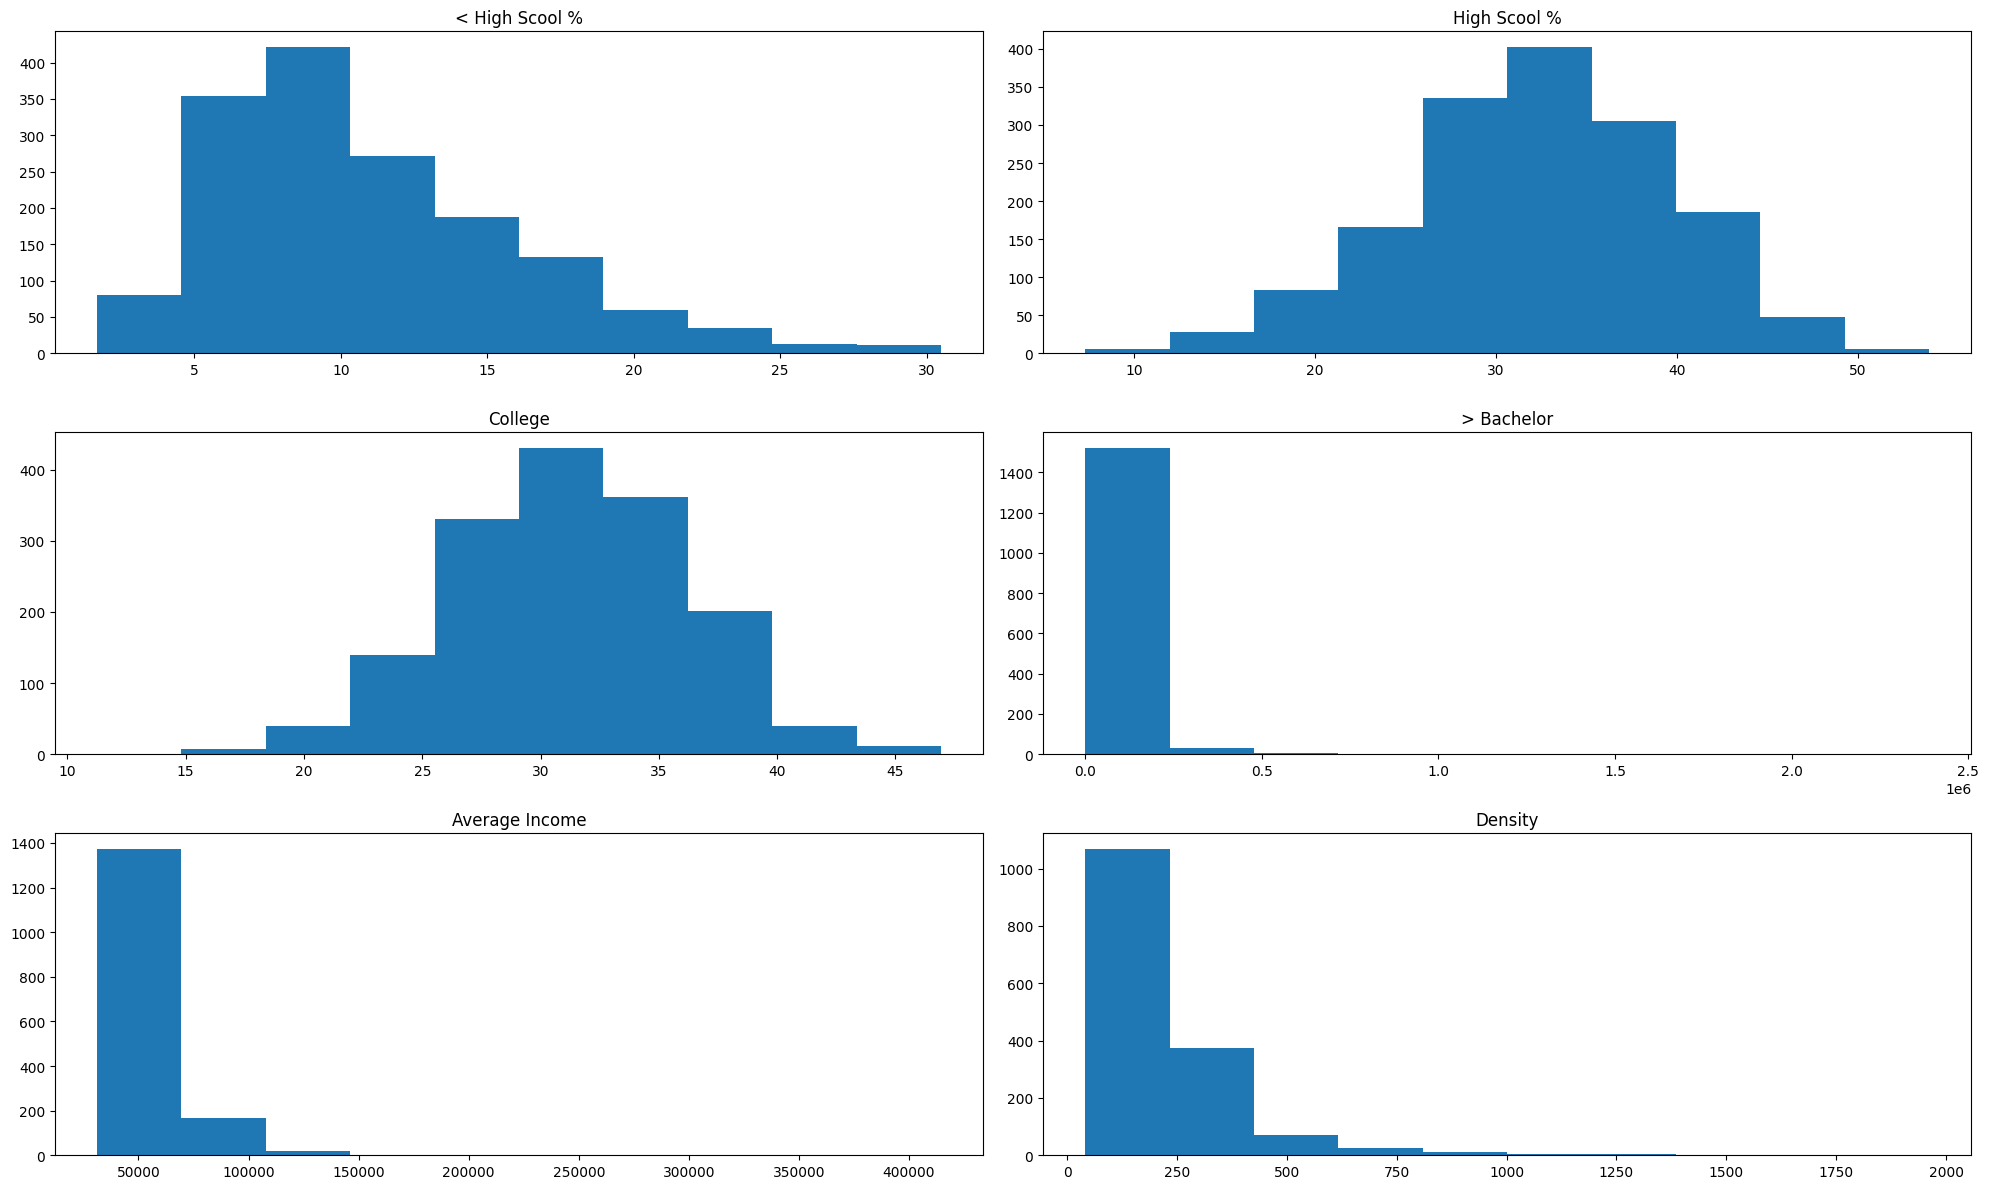

In [56]:
plt.figure(figsize=(20, 12))

plt.subplot(3, 2, 1)
plt.hist(df_pre['< high school %'])
plt.title('< High Scool %')

plt.subplot(3, 2, 2)
plt.hist(df_pre['high school %'])
plt.title('High Scool %')

plt.subplot(3, 2, 3)
plt.hist(df_pre['college or associate %'])
plt.title('College')

plt.subplot(3, 2, 4)
plt.hist(df_pre['> bachelor'])
plt.title('> Bachelor')

plt.subplot(3, 2, 5)
plt.hist(df_pre['average income'])
plt.title('Average Income')

plt.subplot(3, 2, 6)
plt.hist(df_pre['density'])
plt.title('Density')

plt.tight_layout()
plt.show()

In [59]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fips                    1564 non-null   object 
 1   county                  1564 non-null   object 
 2   state                   1564 non-null   object 
 3   mean rate               1564 non-null   object 
 4   < high school           1564 non-null   float64
 5   high school             1564 non-null   float64
 6   college or associate    1564 non-null   float64
 7   > bachelor              1564 non-null   float64
 8   < high school %         1564 non-null   float64
 9   high school %           1564 non-null   float64
 10  college or associate %  1564 non-null   float64
 11  > bachelor %            1564 non-null   float64
 12  average income          1564 non-null   object 
 13  density                 1564 non-null   float64
 14  log > bachelor %        1564 non-null   

In [64]:
df_pre['average income'] = df_pre['average income'].astype('float')
df_pre['mean rate'] = df_pre['mean rate'].astype('float')

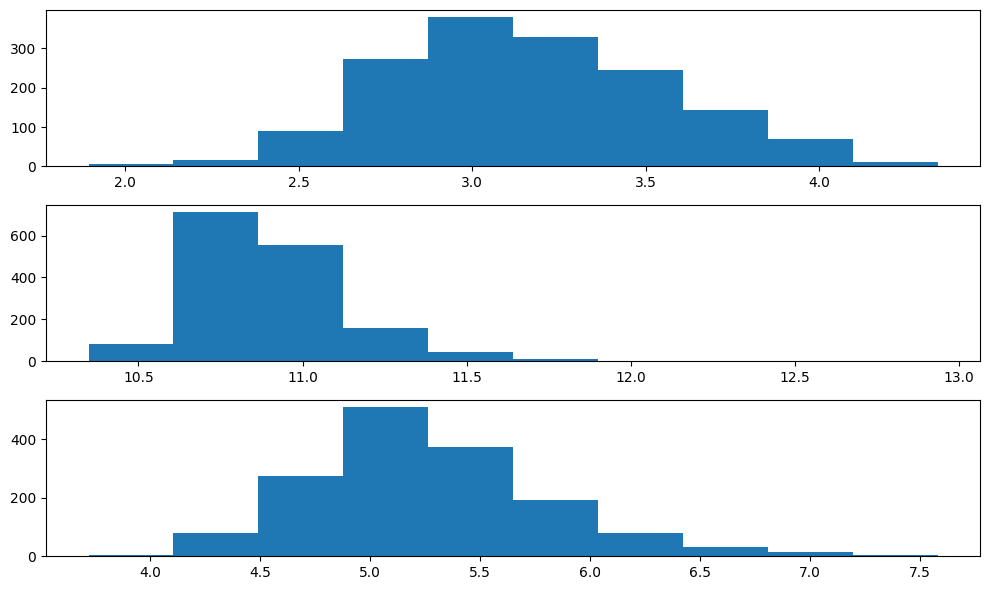

In [62]:
df_pre['log > bachelor %'] = np.log(df_pre['> bachelor %'])
df_pre['log average income'] = np.log(df_pre['average income'])
df_pre['log density'] = np.log(df_pre['density'])

plt.figure(figsize=(10, 6))
plt.subplot(3,1,1)
plt.hist(df_pre['log > bachelor %'])

plt.subplot(3,1,2)
plt.hist(df_pre['log average income'])

plt.subplot(3,1,3)
plt.hist(df_pre['log density'])

plt.tight_layout()
plt.show()

## 3.1 Multiple Regression

In [65]:
X = df_pre[['< high school %', 'high school %', 'college or associate %', 'log > bachelor %', 'log average income', 'log density']]
y = df_pre['mean rate']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              mean rate   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     436.5
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:13:02   Log-Likelihood:                -2344.9
No. Observations:                1564   AIC:                             4704.
Df Residuals:                    1557   BIC:                             4741.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37